In [1]:
from collections import defaultdict

from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm

import datasets
import utils

samples = utils.get_train_samples()
dataset = datasets.DataAnalysisDataset(samples,  './data/train')

edges = defaultdict(list)
for image, mask, id in tqdm(dataset):
    edges['top'].append(image[0, :, :].flatten())
    edges['bottom'].append(image[100, :, :].flatten())
    edges['left'].append(image[:, 0, :].flatten())
    edges['right'].append(image[:, -1, :].flatten())


vertical_edges = edges['top'] + edges['bottom']

neigh = NearestNeighbors(1, n_jobs=-1, metric='euclidean')
neigh.fit(vertical_edges)
dist, ind = neigh.kneighbors()

100%|██████████| 4000/4000 [00:05<00:00, 748.22it/s]


In [2]:
ids = [id for image, mask, id in tqdm(dataset)]

100%|██████████| 4000/4000 [00:05<00:00, 737.37it/s]


In [3]:
print(ind.shape)

(8000, 2)


In [6]:
neighbors_of_top = zip(range(len(dataset)), ind, dist)
sorted_neighbors = sorted(neighbors_of_top, key=lambda x: x[2][0])
sorted_neighbors = [(id, indices[0], d) for id, indices, d in sorted_neighbors if indices[0] >= len(dataset)]

[0. 0.] 3993 2970
[0.05921439 0.06826233] 2856 1551
[0.13986317 2.57310193] 73 511
[0.15324254 0.15384349] 3586 2360
[0.20968477 0.21328431] 1152 1152
[0.22476439 0.24743202] 3595 1324
[0.23013962 0.28953289] 863 893
[0.33503602 0.4017838 ] 3907 632
[0.33538011 0.52173077] 2044 3675
[0.34279535 0.37468941] 1609 3802


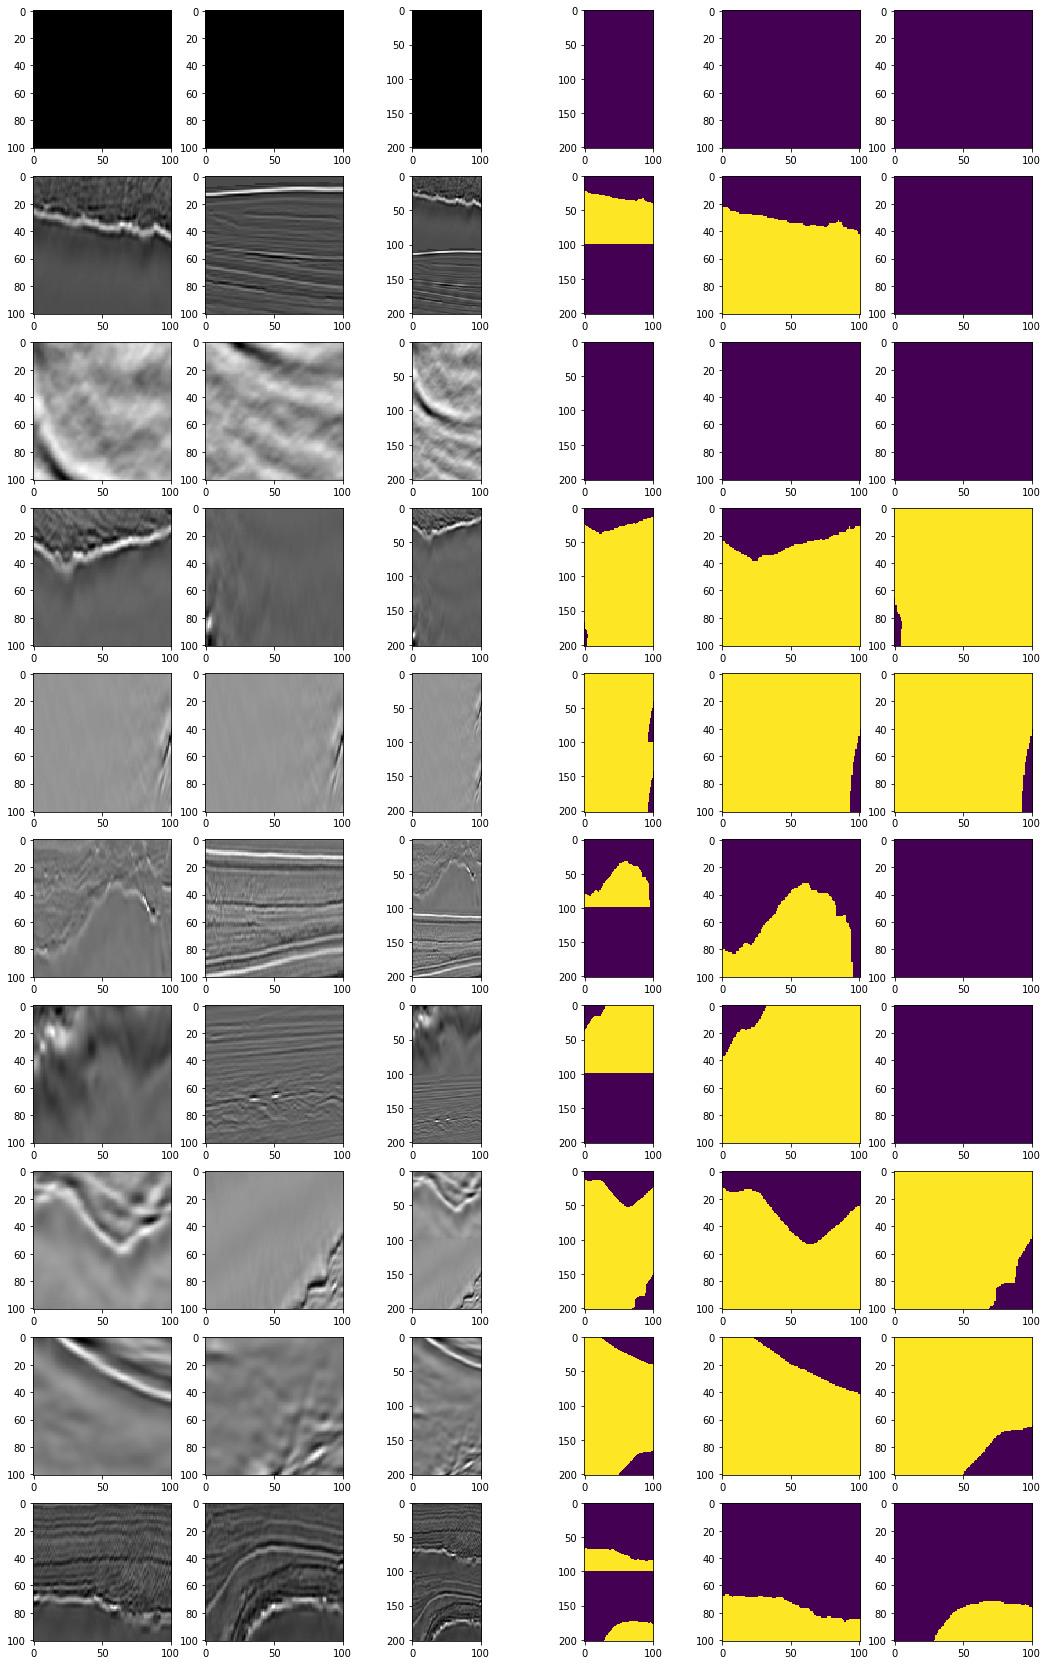

In [8]:
from os.path import join

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.io import imread
from skimage import img_as_float
rows = 10
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))

for i, (id, idx, d) in enumerate(sorted_neighbors[:rows]):
    
    bottom = id
    top = idx
    
    if top >= len(dataset):
        top = top - len(dataset)
        
    if bottom >= len(dataset):
        bottom = bottom - len(dataset)
    
    print(d, top, bottom)
    
    image_top = img_as_float(imread(join('./data/train', 'images', ids[top]) + '.png'))[:, :, :]
    image_bottom = img_as_float(imread(join('./data/train', 'images', ids[bottom]) + '.png'))
    image_cat = np.concatenate([image_top, image_bottom], axis=0)
    
    mask_top = img_as_float(imread(join('./data/train', 'masks', ids[top]) + '.png'))
    mask_bottom = img_as_float(imread(join('./data/train', 'masks', ids[bottom]) + '.png'))
    mask_cat = np.concatenate([mask_top, mask_bottom], axis=0)
    
    ax[i][0].imshow(image_top)
    ax[i][1].imshow(image_bottom)
    ax[i][2].imshow(image_cat)
    ax[i][3].imshow(mask_cat)
    ax[i][4].imshow(mask_top)
    ax[i][5].imshow(mask_bottom)
